# TweetStreet - Data Cleaning and Visualization (Historic)

We have collected Tweet sentiments and Stock closing prices for the past month. In this notebook, we are going to explore the collected data, summarize and plot them with different aspects to get more insights about the data

## Background of Data

 Companies under consideration  -  Apple, Visa, Amazon, Walmart, Netflix, Nike, Macys.
  
 Time period - November 2017.
  
 Approach - Fetch Stock prices and Tweet Sentiments for the past month, clean and explore data to see if there is a correlation.


In [1]:
#Import requirements
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import matplotlib.cm as cm

plt.style.use('bmh')


## Reading the data and making dataframes

In [2]:
handles = ["@Apple", "@Visa", "@amazon", "@Walmart",'@netflix','@Nike','@Macys']
dataframes = {}

In [3]:
for handle in handles:
    print(f"data/sentiments_{handle}.csv")
    df = pd.read_csv(f"data/sentiments_{handle}.csv")
    df = df.drop("Unnamed: 0",axis=1)
    df = df.reset_index()
    df = df.rename(columns={"index":"id"})
    
    df = df.drop(df[df['compound'] == "compound"].index)
    df = df.dropna(how='any') 
    
    df["compound"] = pd.to_numeric(df["compound"] )
    df["neg"] = pd.to_numeric(df["neg"] )
    df["neu"] = pd.to_numeric(df["neu"] )
    df["pos"] = pd.to_numeric(df["pos"] )
    df["date"] = [datetime.strptime(x,"%a %b %d %H:%M:%S %z %Y").date() for x in df["tweet_date"]]
    
    df = df[["compound","date"]]
    date_group = df.groupby(["date"])
    compound_date = pd.DataFrame(date_group.mean())
    compound_date = compound_date.reset_index()
    
    dataframes.update({handle:compound_date})
    

data/sentiments_@Apple.csv
data/sentiments_@Visa.csv
data/sentiments_@amazon.csv
data/sentiments_@Walmart.csv
data/sentiments_@netflix.csv
data/sentiments_@Nike.csv
data/sentiments_@Macys.csv


## Plotting the features (Isolated)

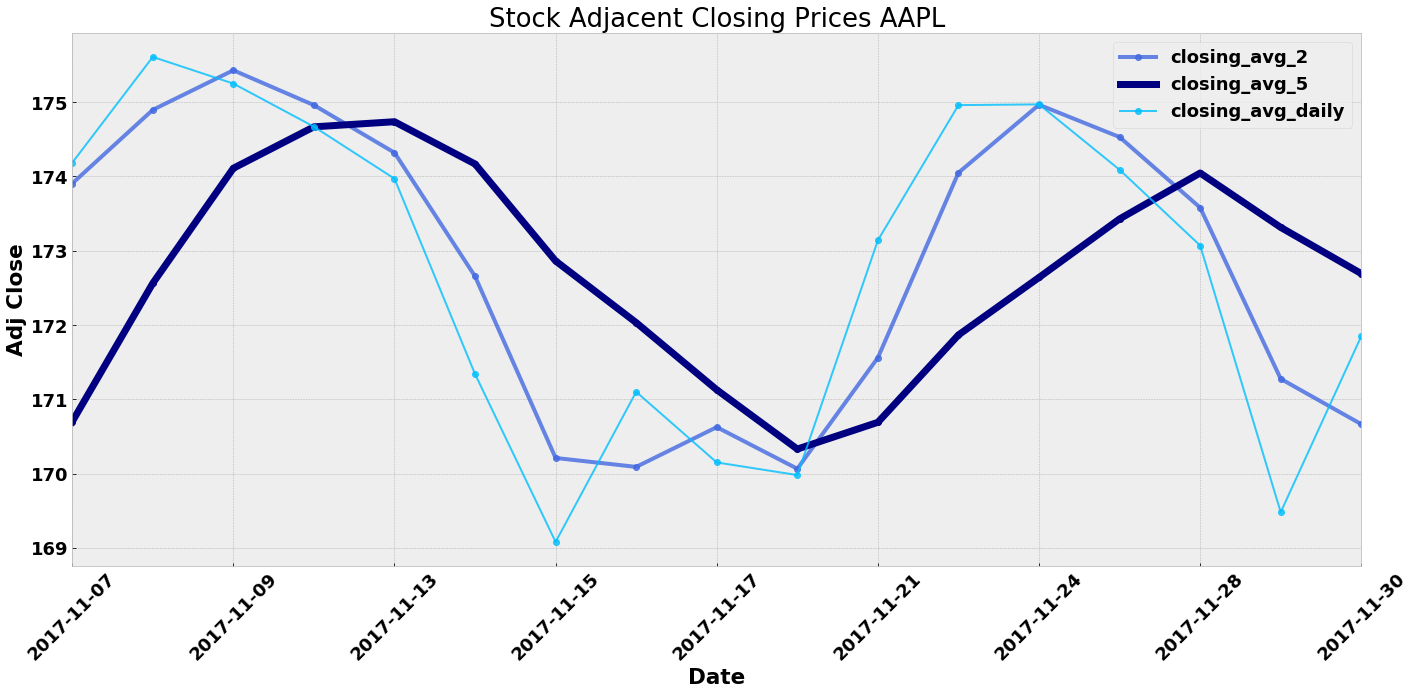

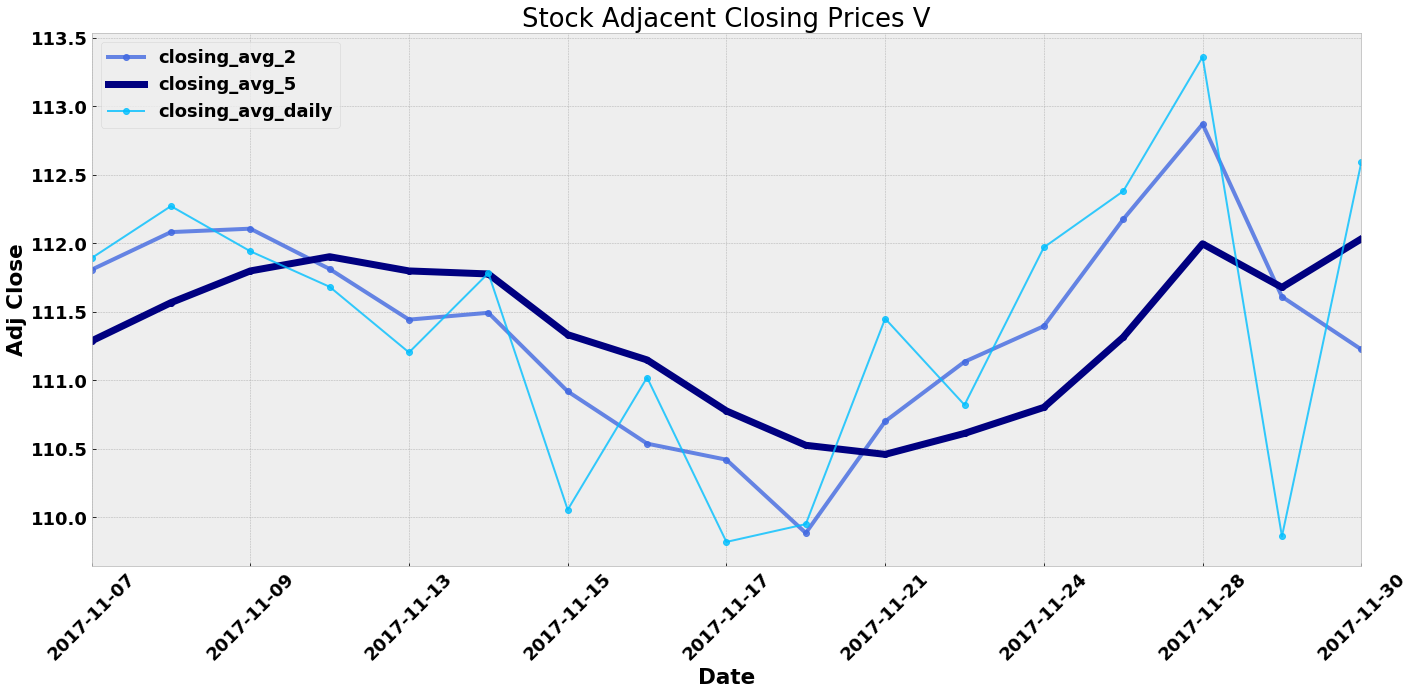

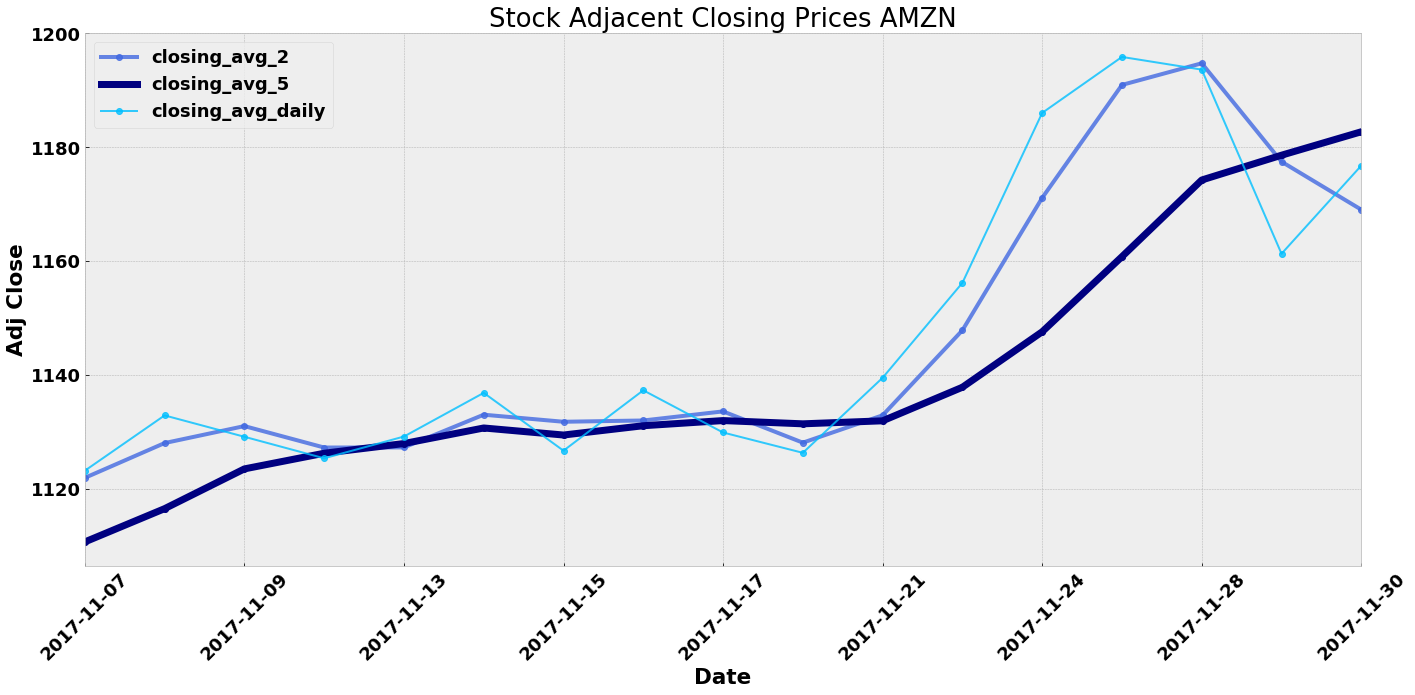

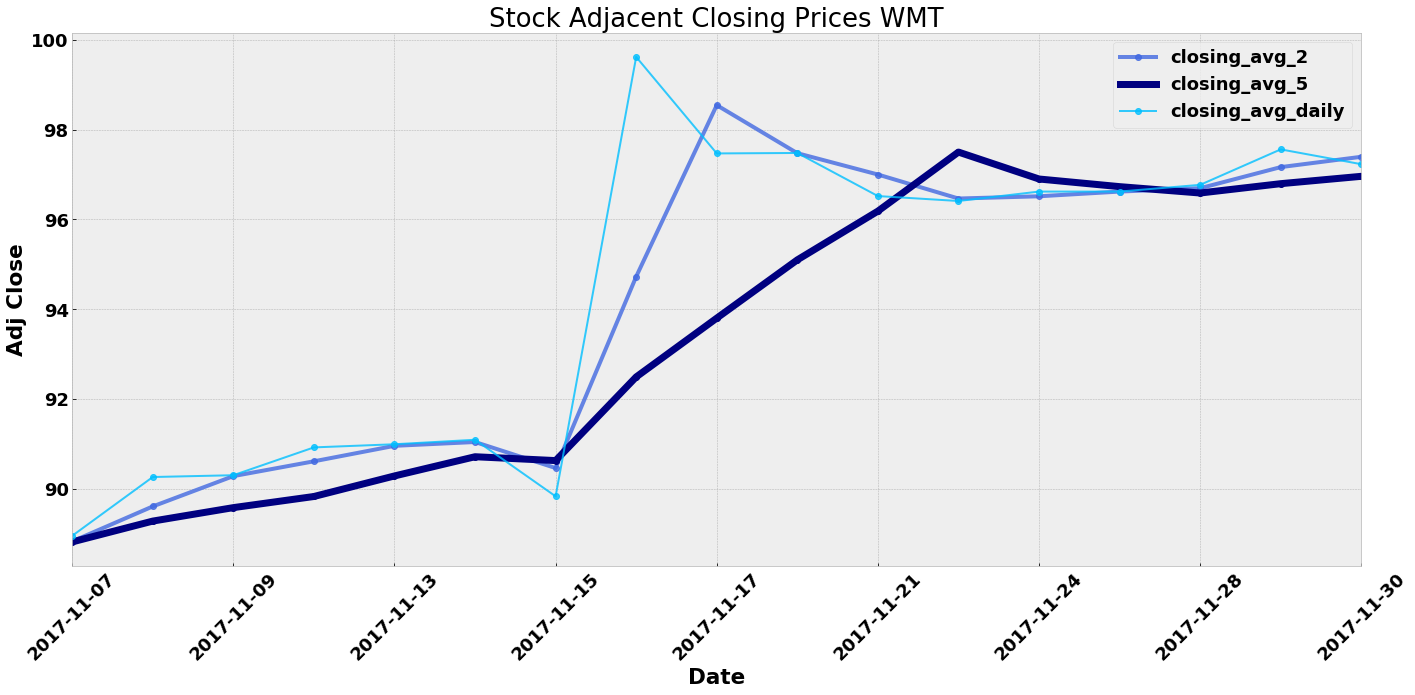

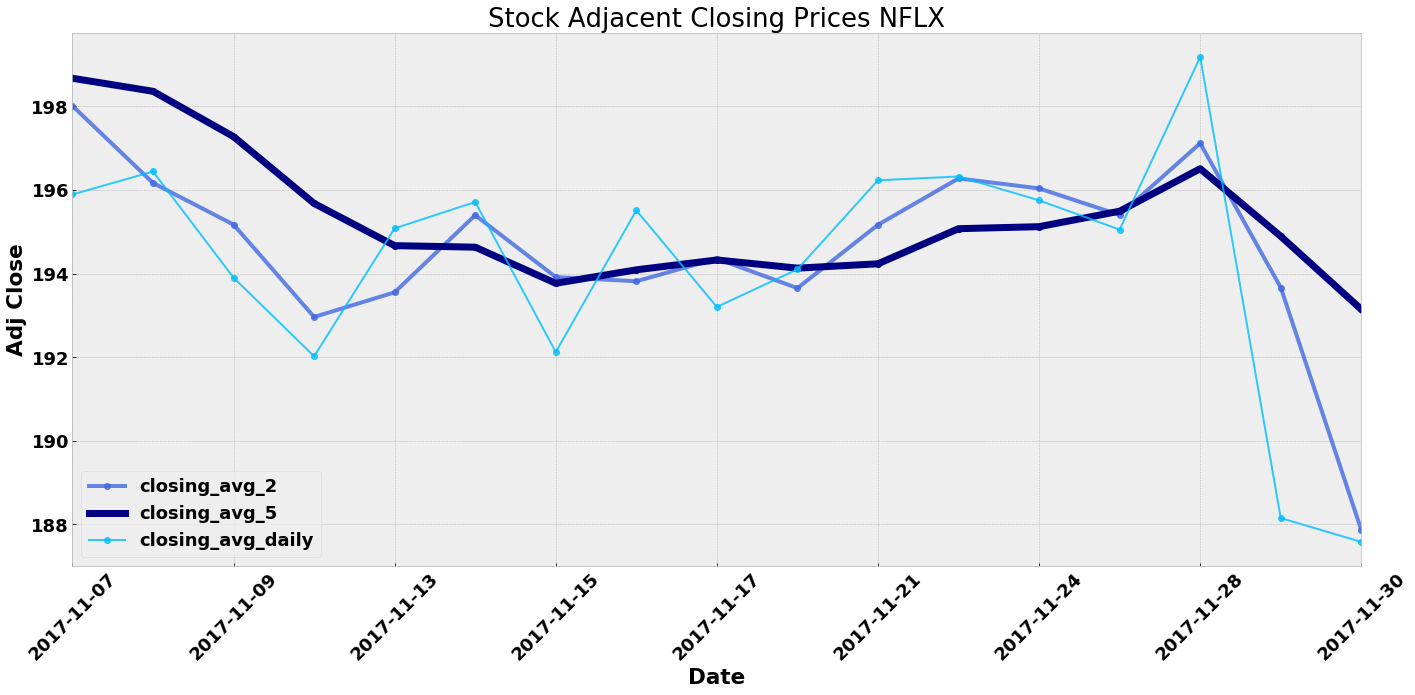

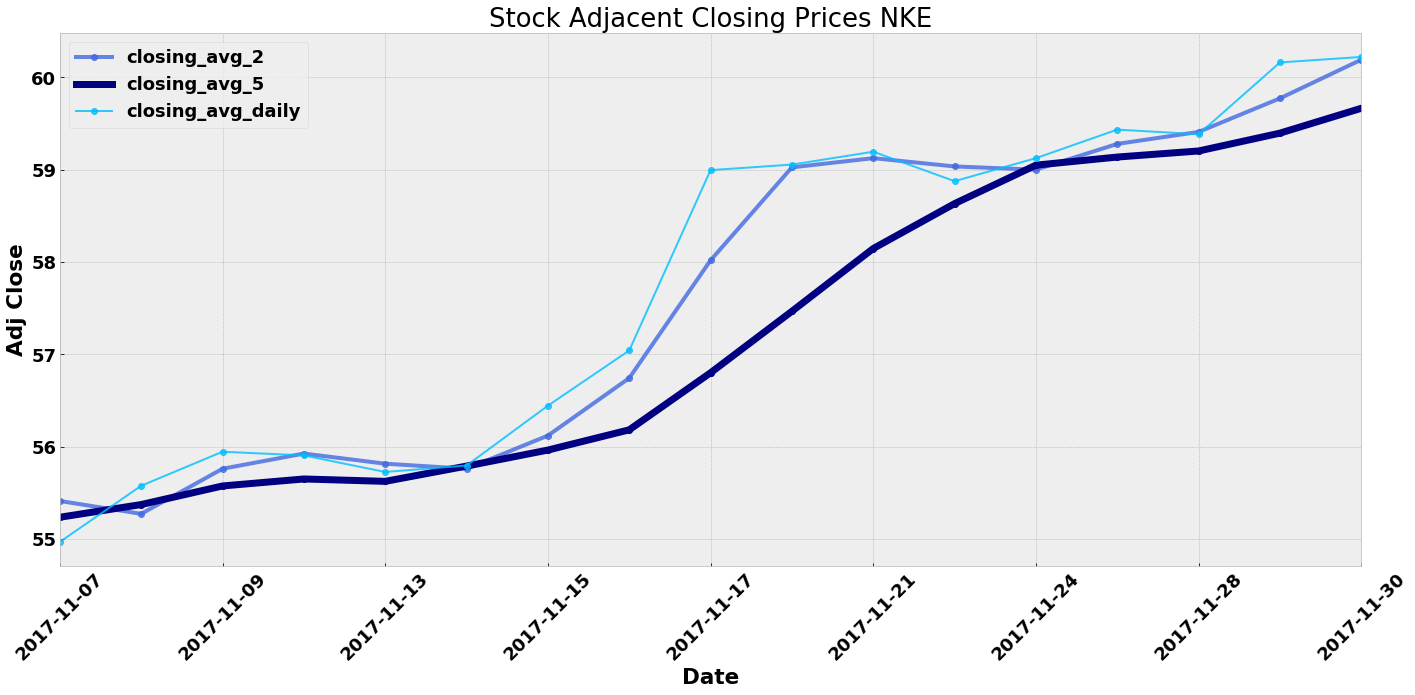

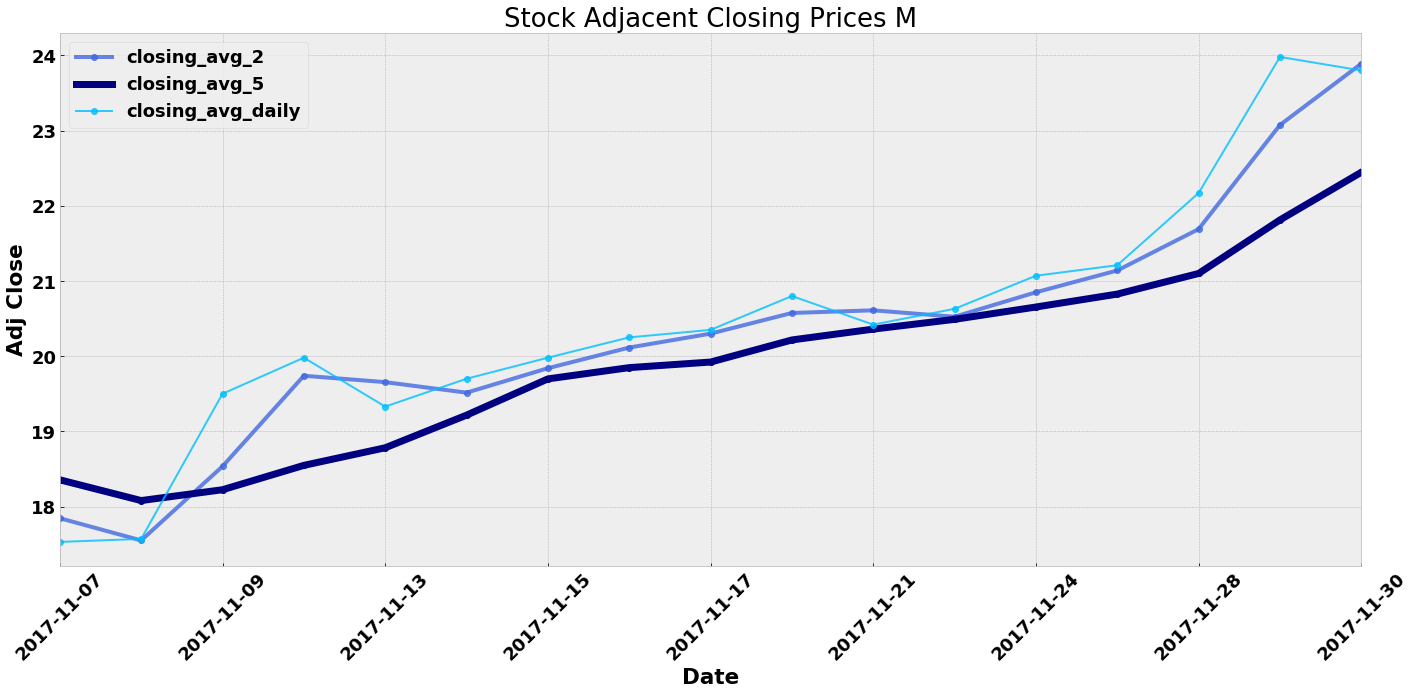

In [4]:
tickers = ['AAPL', 'V', 'AMZN', 'WMT', 'NFLX', 'NKE', 'M']

for ticker in tickers:
    df = pd.read_csv(f"data\{ticker}.csv")
    df = df[["Date","Adj Close"]]
    
    df_2 = df.rolling(2).mean()
    df_2 = df_2.rename(columns={"Adj Close":"closing_avg_2"})
    
    df_5 = df.rolling(5).mean()
    df_5 = df_5.rename(columns={"Adj Close":"closing_avg_5"})
    
    df = df.rename(columns={"Adj Close":"closing_avg_daily"})
    
    df = df.merge(df_2,on="Date")
    df = df.merge(df_5,on="Date")
    
    df = df.dropna(how="any")
    
    matplotlib.rcParams.update({'font.size': 16})
    plt.rcParams["font.size"] = 18
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    
    ax = df.plot(kind="line",x="Date",y="closing_avg_2",linewidth=4,figsize=(20,10),alpha=0.80,marker="o",color="royalblue")
    df.plot(kind="line",x="Date",y="closing_avg_5",linewidth=7,ax=ax,marker="o",color="navy")
    df.plot(kind="line",x="Date",y="closing_avg_daily",linewidth=2,ax=ax,marker="o",alpha=0.80,color="deepskyblue")
    plt.xlabel("Date")
    plt.ylabel("Adj Close")
    plt.title(f"Stock Adjacent Closing Prices {ticker}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/ppt/Stocks_Closing_{ticker}.png")
    
    plt.show()


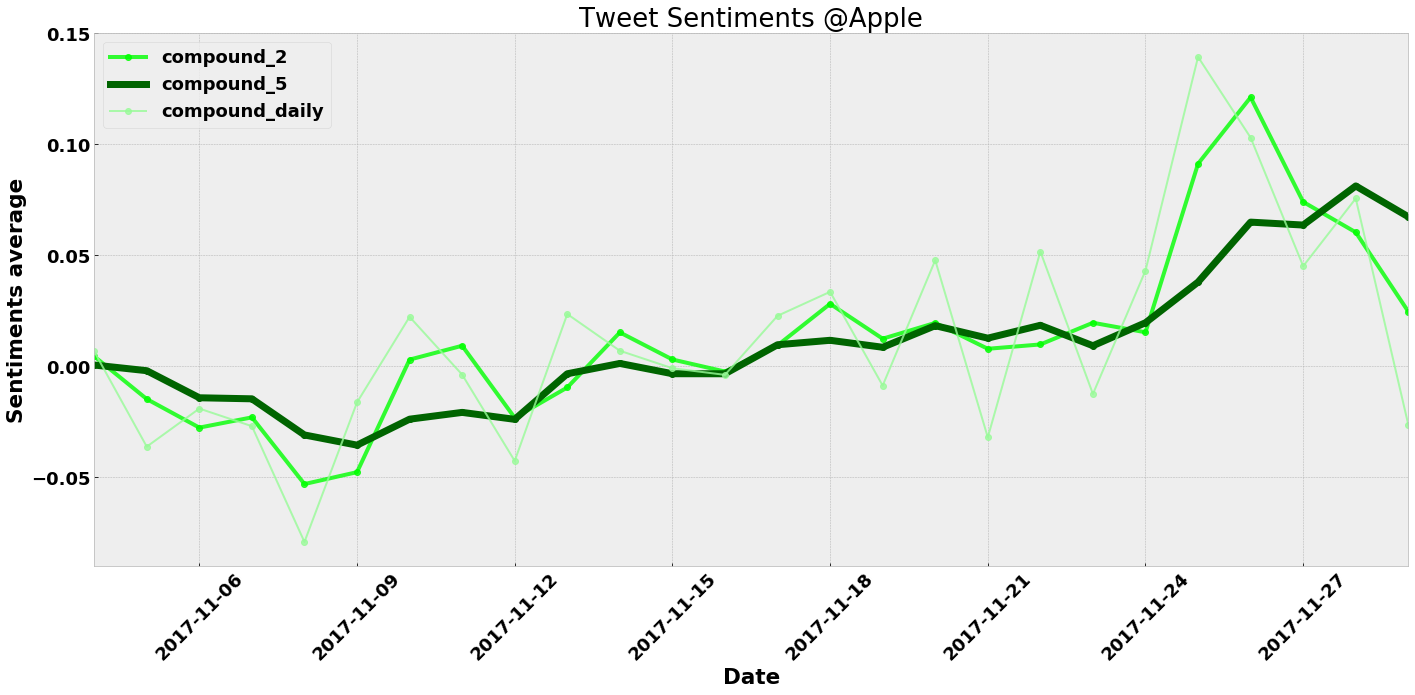

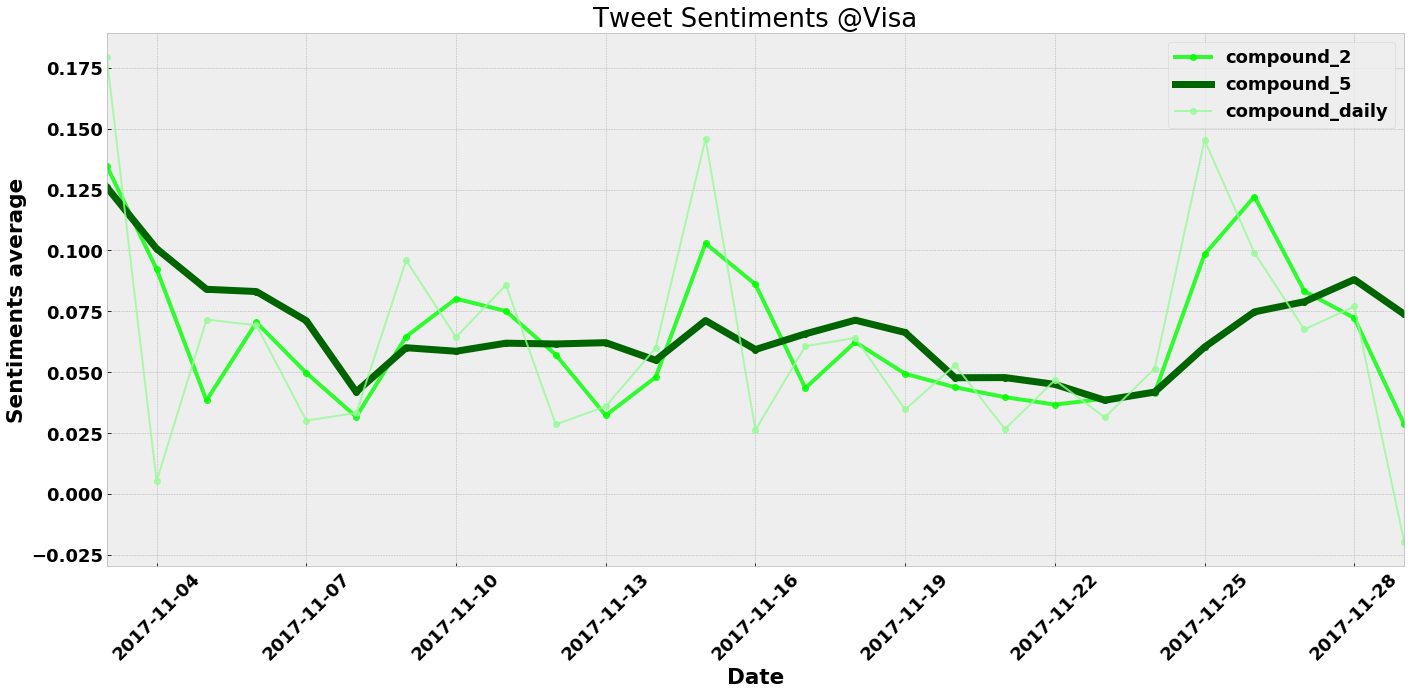

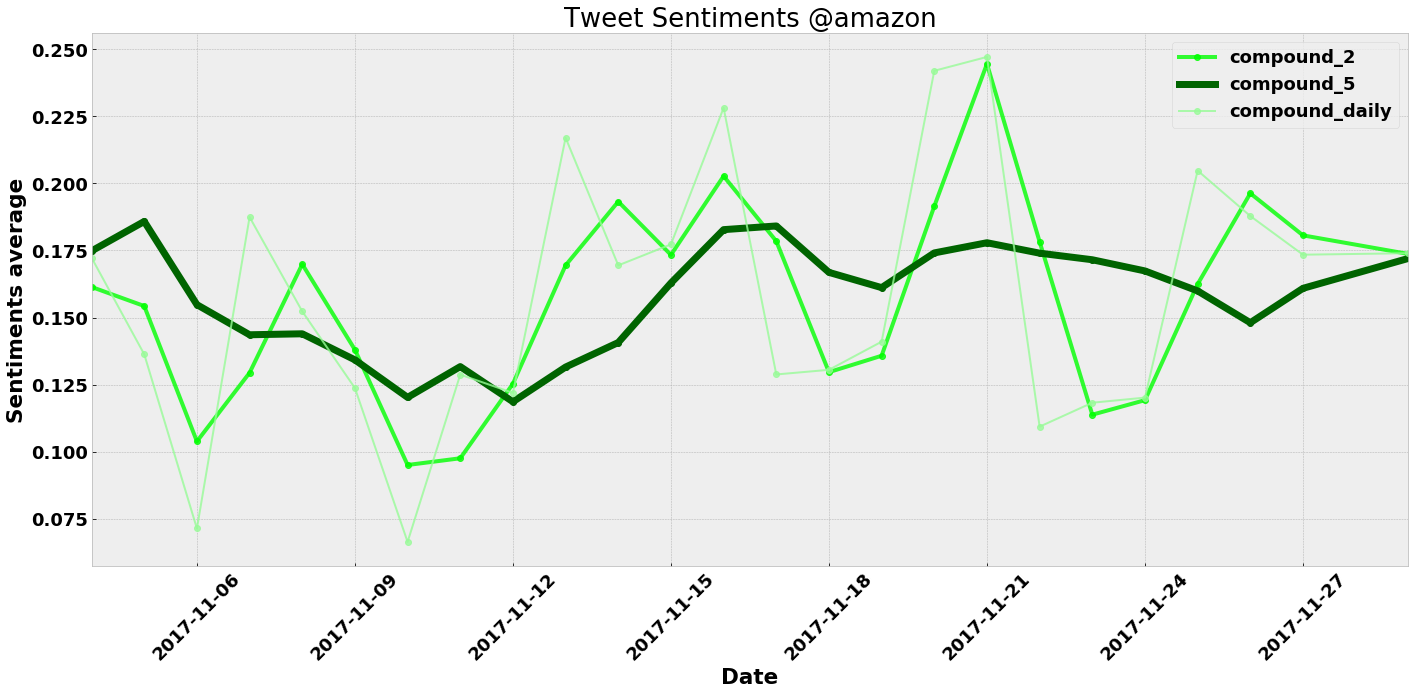

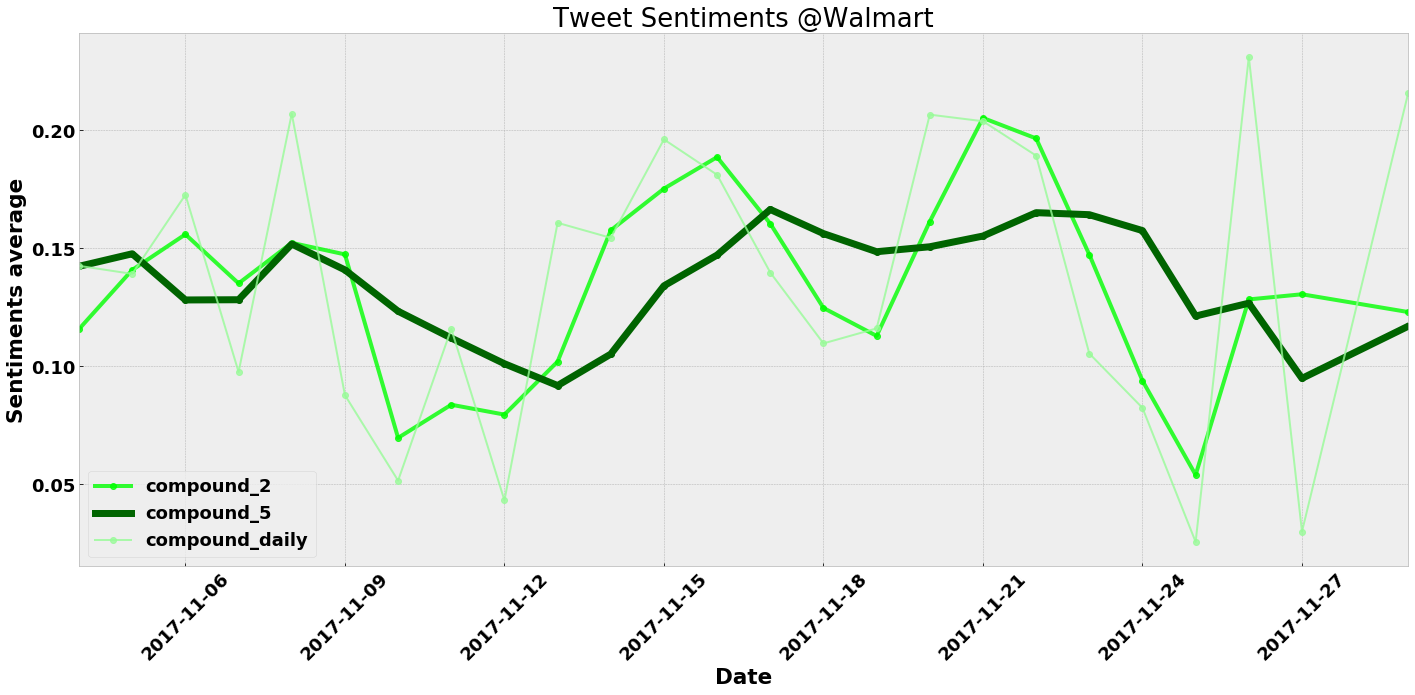

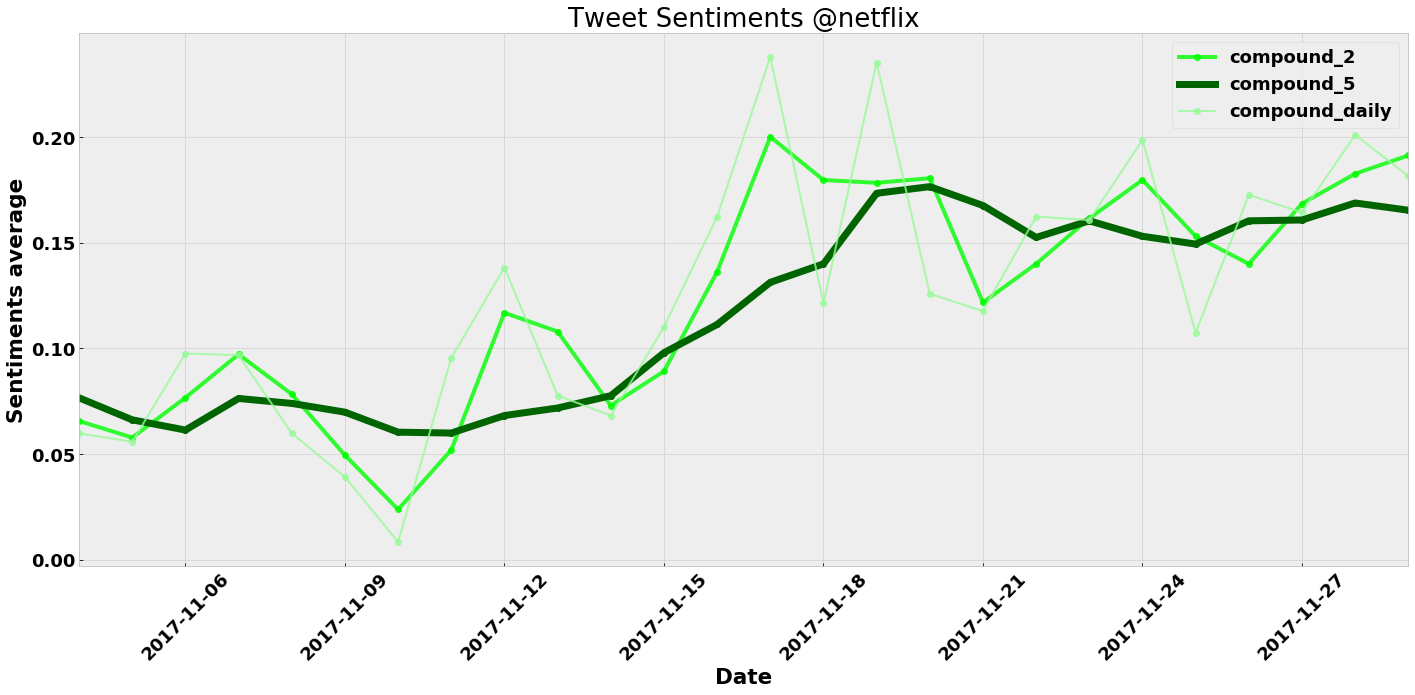

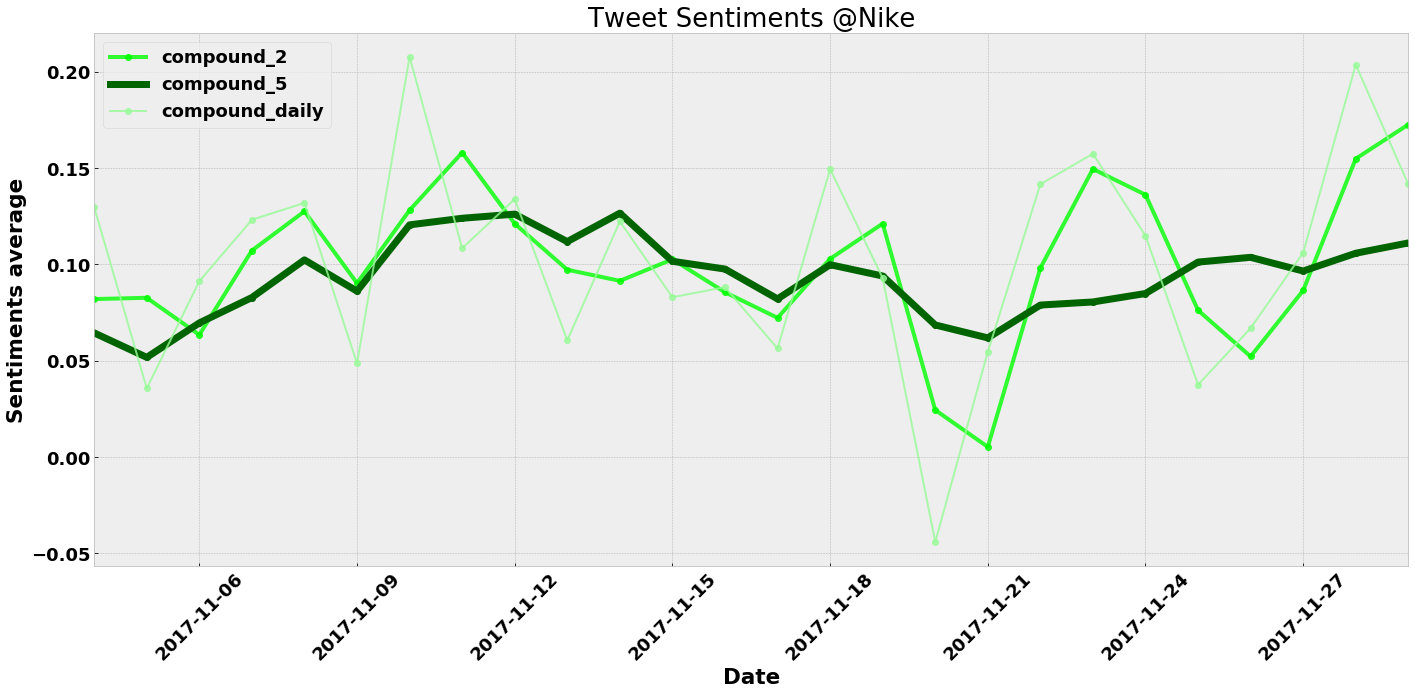

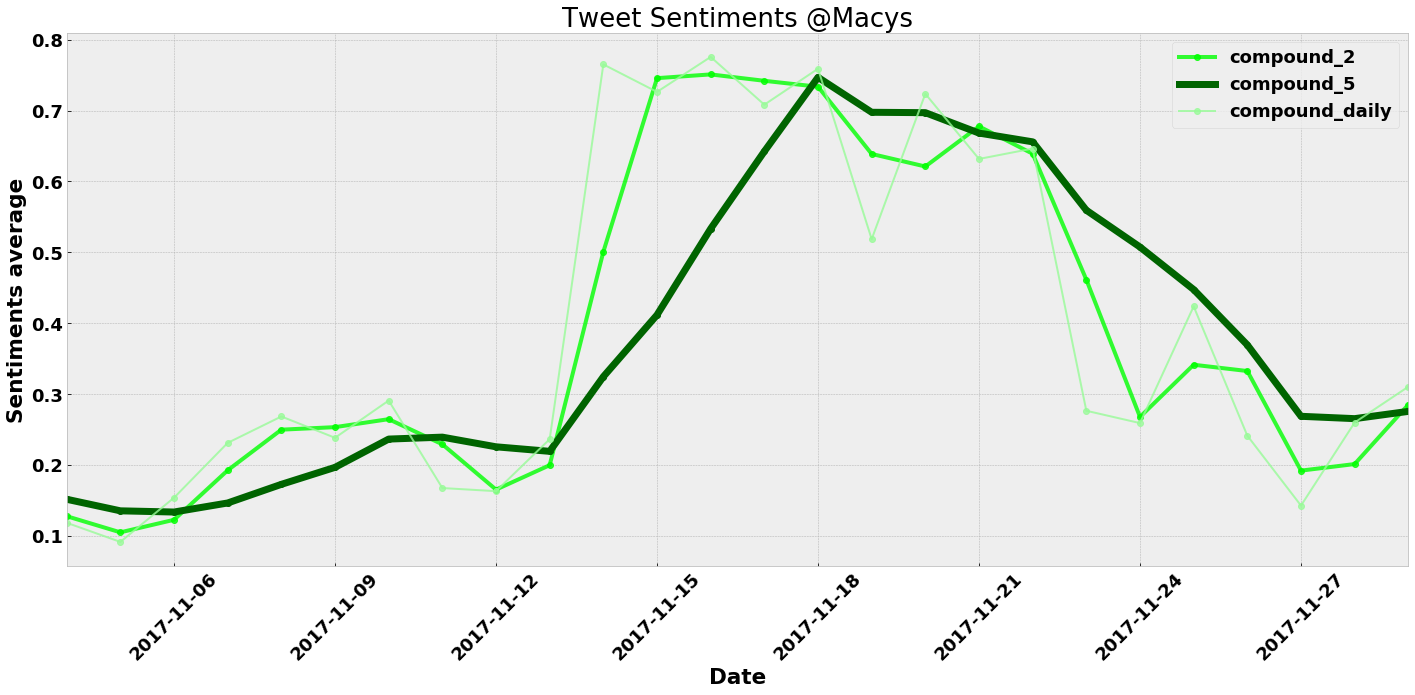

In [5]:
def plot_mvg_sentiments(base,df,window_size):
    df.plot(kind="line",x="date",y="compound",color="blue",label="compound",marker="o",figsize=(20,10))
    plt.axhline(0.00)
    plt.xlabel("date")
    plt.ylabel("sentiment")
    plt.title(f"{base}_{window_size}_{key}")
    plt.xticks(rotation=60)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/{base}_{window_size}_{key}.png")

for key, df in dataframes.items():
    base_file = "Compound_Senti_Mvg"
    
    df_2 = df.rolling(2).mean()
    df_2 = df_2.rename(columns={"compound":"compound_2"})
    
    df_5 = df.rolling(5).mean()
    df_5 = df_5.rename(columns={"compound":"compound_5"})
    
    df = df.rename(columns={"compound":"compound_daily"})
    
    df = df.merge(df_2,on="date")
    df = df.merge(df_5,on="date")
    
    df = df.dropna(how="any")
    
    ax = df.plot(kind="line",x="date",y="compound_2",linewidth=4,figsize=(20,10),alpha=0.80,marker="o",color="lime")
    df.plot(kind="line",x="date",y="compound_5",linewidth=7,ax=ax,marker="o",color="darkgreen")
    df.plot(kind="line",x="date",y="compound_daily",linewidth=2,ax=ax,marker="o",alpha=0.80,color="palegreen")
    
    plt.savefig("figures/ppt/sentiments_{key}.png")
    
    plt.xlabel("Date")
    plt.ylabel("Sentiments average")
    plt.title(f"Tweet Sentiments {key}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    plt.show()

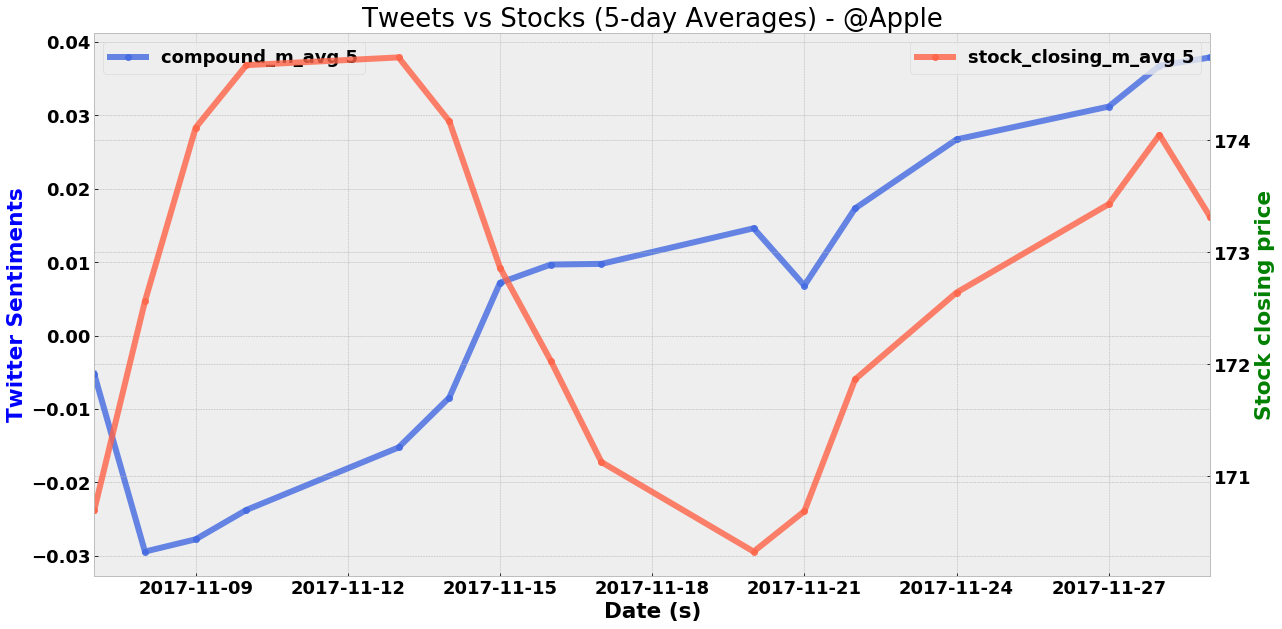

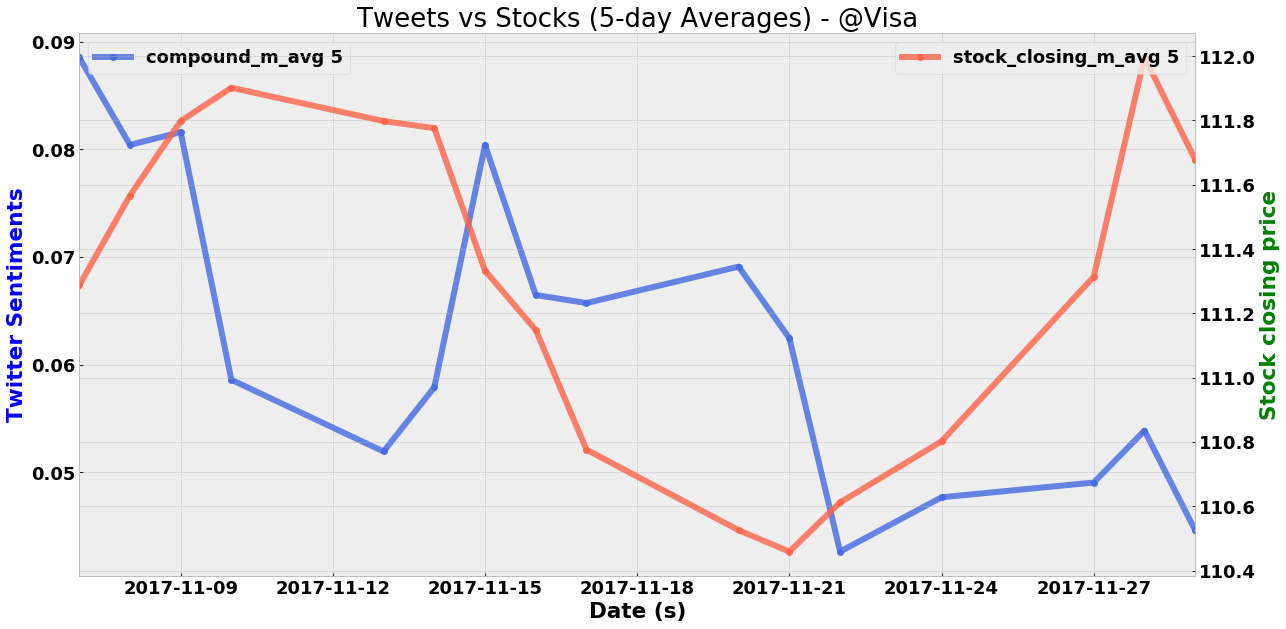

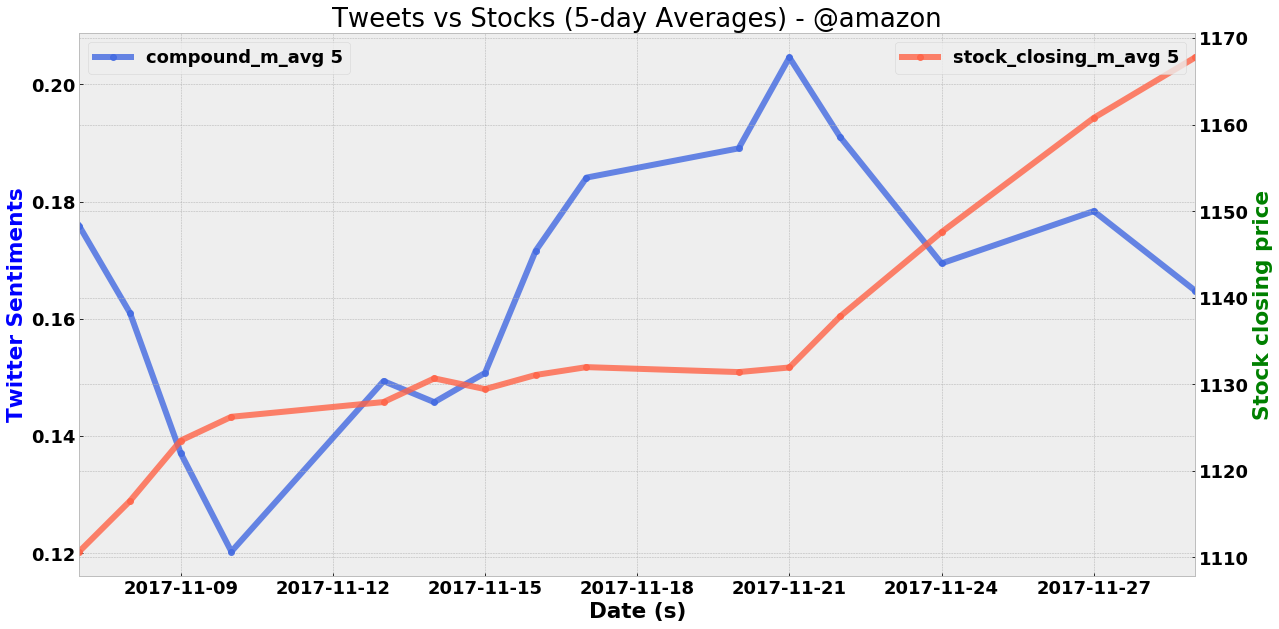

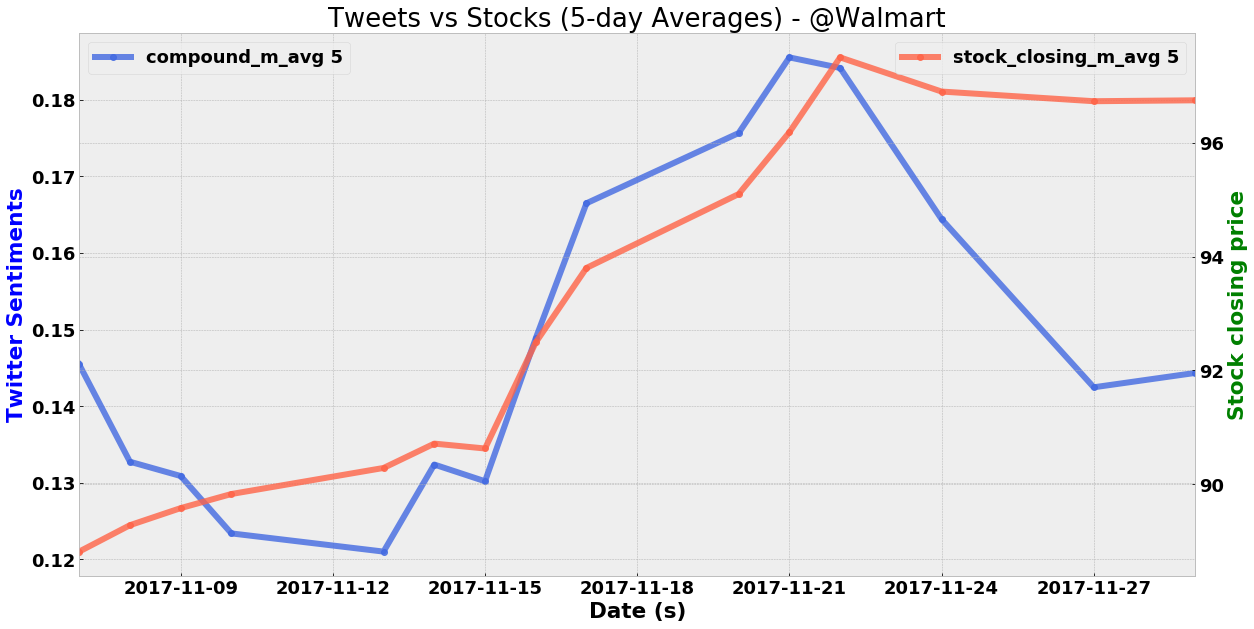

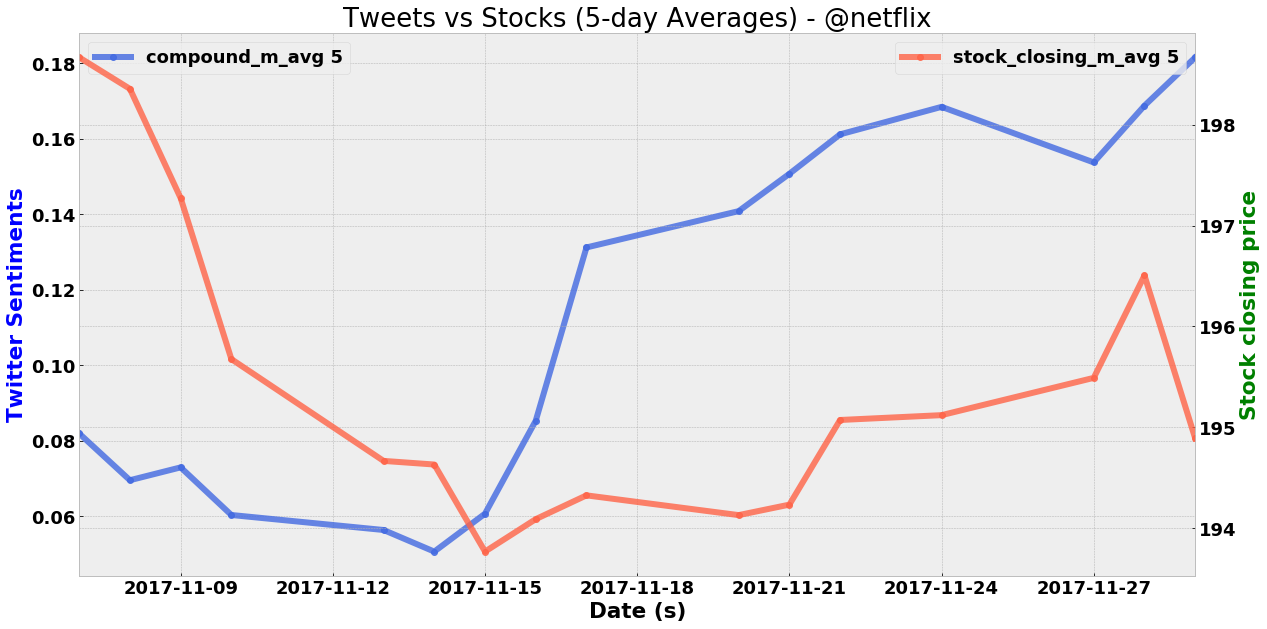

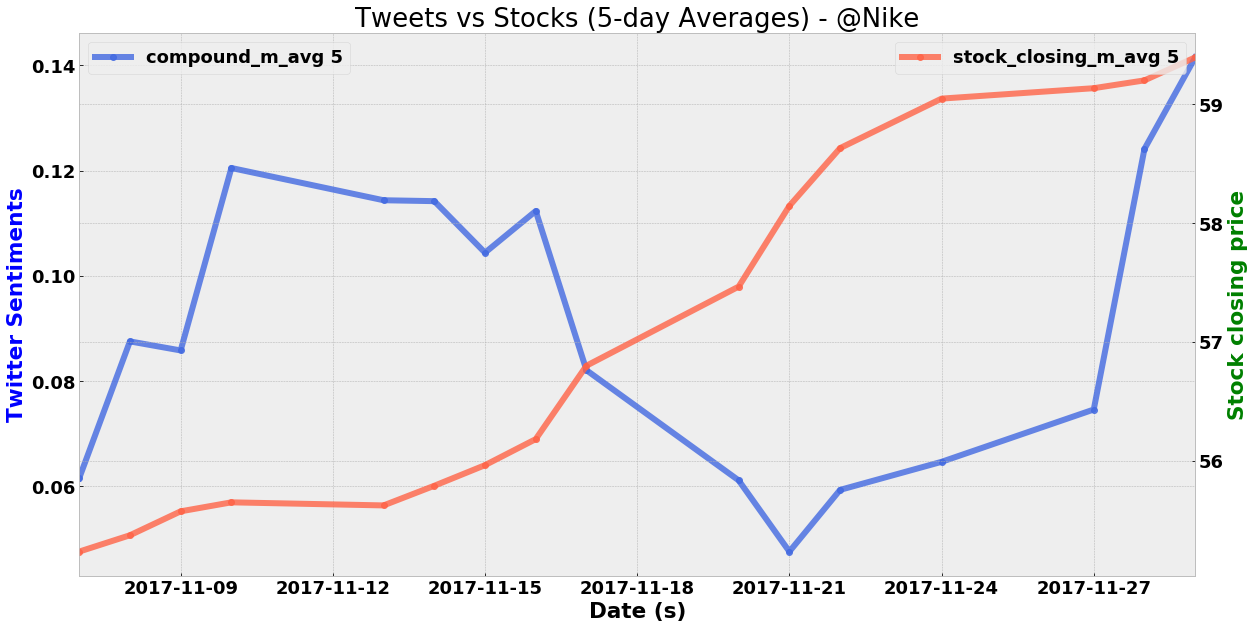

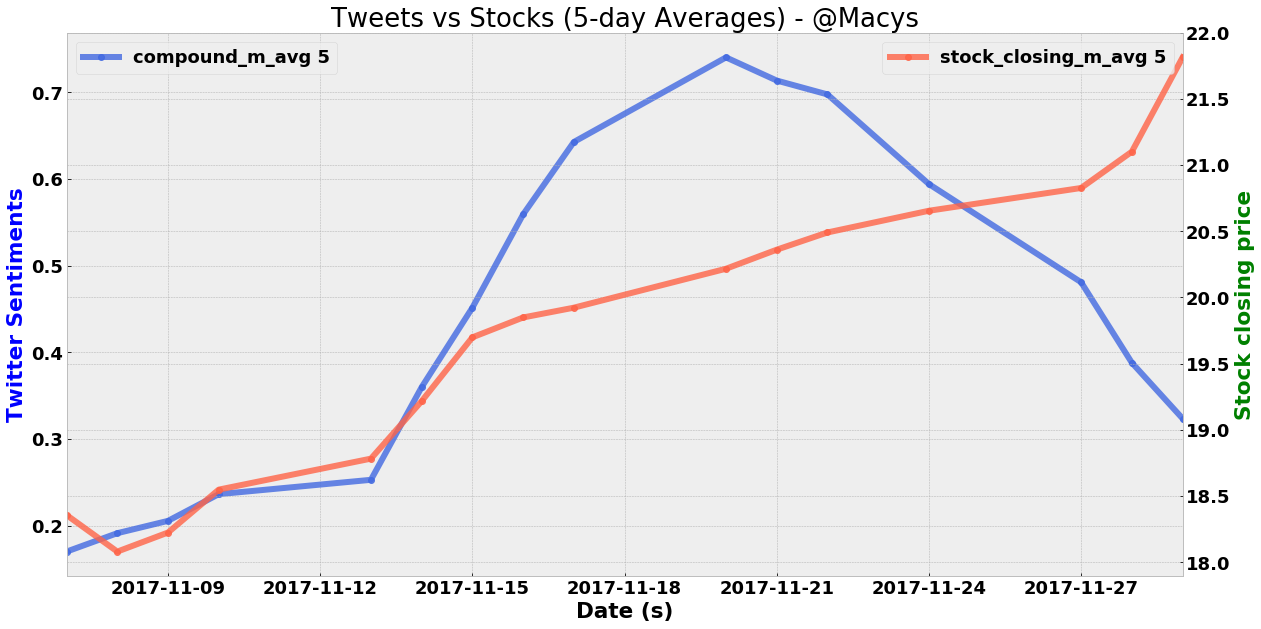

In [6]:
tweet_Stock_map = {"@Apple":"AAPL","@Visa":"V","@amazon":"AMZN","@Walmart":"WMT",'@netflix':"NFLX","@Nike":"NKE",'@Macys':"M"}

stock_tweets_final = pd.DataFrame()

stock_tweets_m_avg = pd.DataFrame()

for handle,sentiment_df in dataframes.items():
    sentiment_df = sentiment_df.rename(columns={"date":"Date"})
    stock_df = pd.read_csv(f"data/{tweet_Stock_map[handle]}.csv")
    stock_df = stock_df[["Date","Adj Close"]]

    stock_df["Date"] = [datetime.strptime(x,"%Y-%m-%d").date() for x in stock_df["Date"]]
    
    stock_df["Company"] = [handle for x in stock_df["Date"]]
    stock_tweets_df = sentiment_df.merge(stock_df, on="Date")
    stock_tweets_final = stock_tweets_final.append(stock_tweets_df)
    
    
    stock_tweets_df = stock_tweets_df.sort_values(['Date'], ascending=True)
    
    stock_tweets_df_rolling_2 =  stock_tweets_df.rolling(2).mean()
    
    stock_tweets_df_rolling_2 = stock_tweets_df_rolling_2.rename(columns = {"compound": "compound_m_avg 2",
                                                                            "Adj Close":"stock_closing_m_avg 2"})
    
    stock_tweets_df_rolling_5 =  stock_tweets_df.rolling(5).mean()
    
    stock_tweets_df_rolling_5 = stock_tweets_df_rolling_5.rename(columns = {"compound": "compound_m_avg 5",
                                                                            "Adj Close":"stock_closing_m_avg 5"})
    
    stock_tweets_df_w_2 = stock_tweets_df.merge(stock_tweets_df_rolling_2,on=["Date","Company"])
    stock_tweets_df_w_5 = stock_tweets_df_w_2.merge(stock_tweets_df_rolling_5,on=["Date","Company"])
    
    stock_tweets_m_avg = stock_tweets_m_avg.append(stock_tweets_df_w_5)
    
    stock_tweets_df_w_5 = stock_tweets_df_w_5.dropna(how="any")
    
    matplotlib.rcParams.update({'font.size': 16})
    plt.rcParams["font.size"] = 18
    
    
    ax = stock_tweets_df_w_5.plot(kind="line",x="Date",y="compound_m_avg 5",linewidth=6,figsize=(20,10),alpha=0.80,marker="o",color="royalblue")
    
    ax.set_xlabel('Date (s)')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax.set_ylabel("Twitter Sentiments", color='b')
    
    ax.set_title(f"Tweets vs Stocks (5-day Averages) - {handle}")
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    stock_tweets_df_w_5.plot(kind="line",x="Date",y="stock_closing_m_avg 5",linewidth=6,ax=ax2,figsize=(20,10),alpha=0.80,marker="o",color="tomato")
    ax2.set_ylabel("Stock closing price", color='g')
    
    ax2.legend(loc='upper right')
    
    plt.savefig(f"figures/ppt/TweetsVsStocks(5-day)_{handle}.png")
    plt.show()

    
    
    
stock_tweets_final.to_csv("Summary_Historic_data.csv")
stock_tweets_m_avg.to_csv("Summary_Historic_moving_Averages.csv")


In [7]:
handle_group = stock_tweets_final.groupby("Company")

company_summary = handle_group.mean()

company_summary = company_summary.rename(columns={"compound":"Tweet_sentiment","Adj Close":"Stock_closing_price"})
company_summary

,Tweet_sentiment,Stock_closing_price
Company,,
@Apple,0.007755,172.217526
@Macys,0.391670,19.936000
@Nike,0.091222,57.140728
@Visa,0.063364,111.299942
@Walmart,0.149182,92.934737
@amazon,0.168841,1135.032638
@netflix,0.116251,195.605500


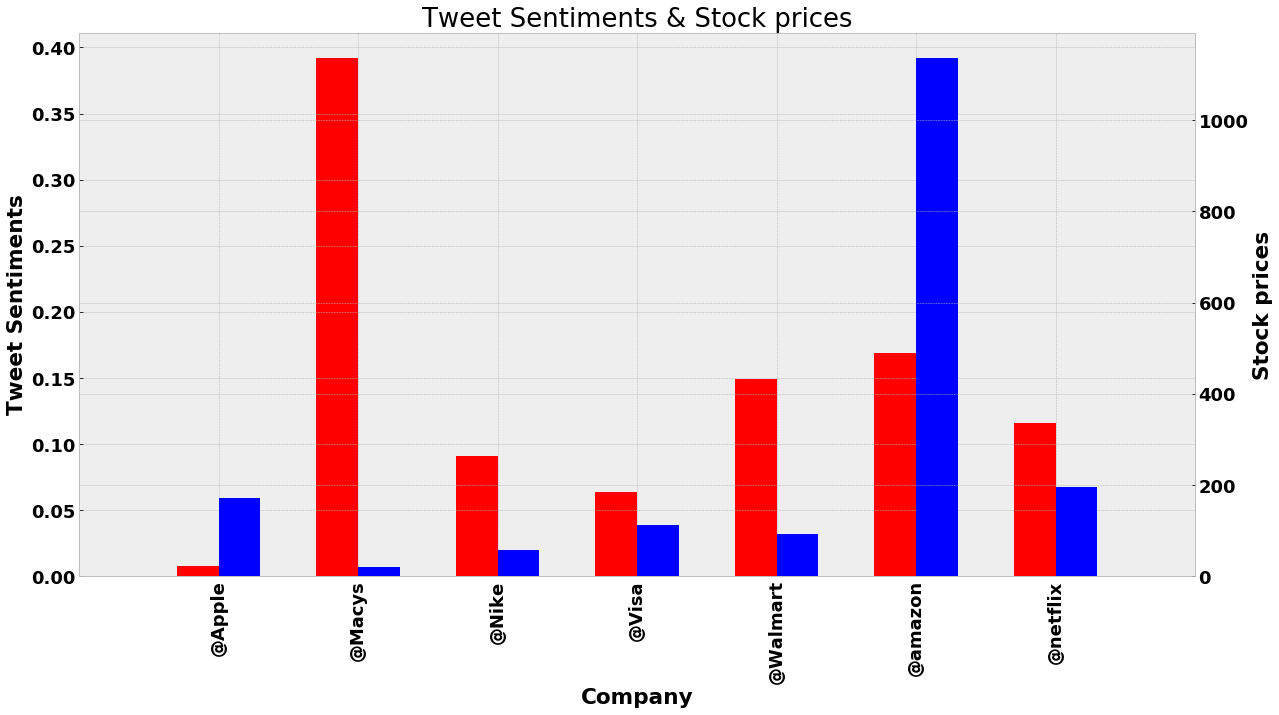

In [8]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

company_summary.Tweet_sentiment.plot(kind='bar', color='red', ax=ax, width=width, position=1,figsize=(20,10))
company_summary.Stock_closing_price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,figsize=(20,10))

ax.set_ylabel('Tweet Sentiments')
ax2.set_ylabel('Stock prices')

ax.set_xlim(-1,len(company_summary))

plt.title("Tweet Sentiments & Stock prices")

plt.savefig("figures/ppt/BarChart_StockSentiments.png")

plt.show()

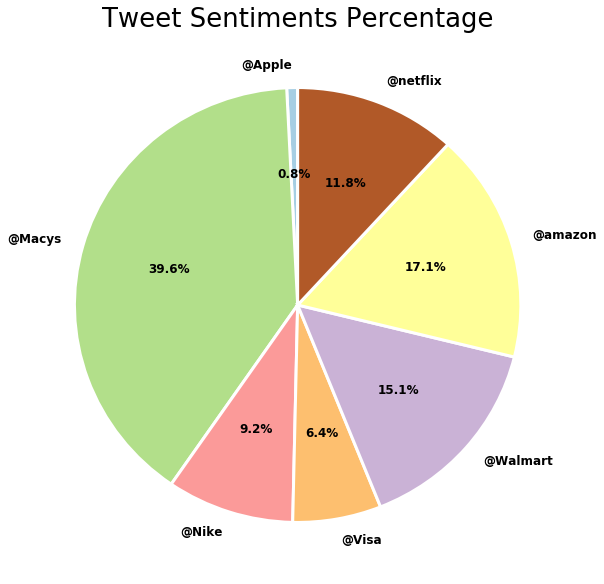

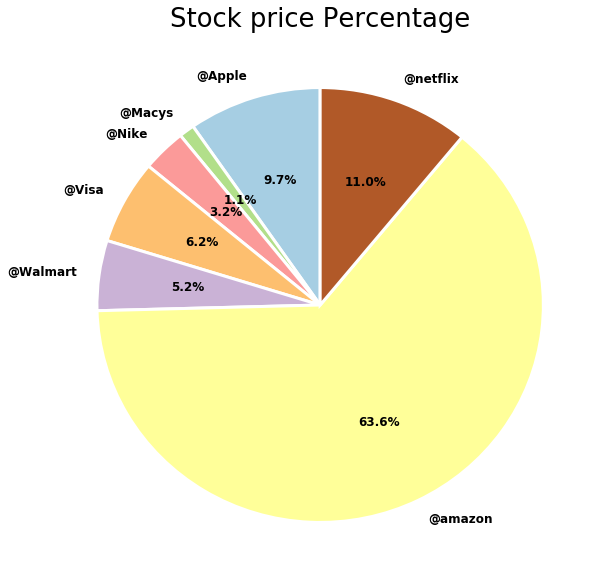

In [9]:
company_summary['Tweet_sentiment'] = company_summary['Tweet_sentiment']*100



company_summary['Tweet_sentiment'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10), legend = False, fontsize=12,cmap = 'Paired',wedgeprops= { 'linewidth' : 3,'edgecolor' : "white" })
plt.ylabel('')
plt.title('Tweet Sentiments Percentage')

plt.savefig("figures/ppt/PieChart_TweetSentiments.png")
plt.show()


company_summary.plot(kind='pie', y = 'Stock_closing_price', autopct='%1.1f%%', startangle=90,figsize=(10,10), legend = False, fontsize=12,cmap = 'Paired',wedgeprops= { 'linewidth' : 3,'edgecolor' : "white" })
plt.ylabel('')
plt.title('Stock price Percentage')
plt.savefig("figures/ppt/PieChart_StockPrices.png")
plt.show()


In [10]:
stock_tweets_final.head()

,Date,compound,Adj Close,Company
0,2017-11-01,0.042015,166.292206,@Apple
1,2017-11-02,-0.024569,167.507828,@Apple
2,2017-11-03,0.002326,171.882111,@Apple
3,2017-11-06,-0.018984,173.625839,@Apple
4,2017-11-07,-0.026920,174.183823,@Apple


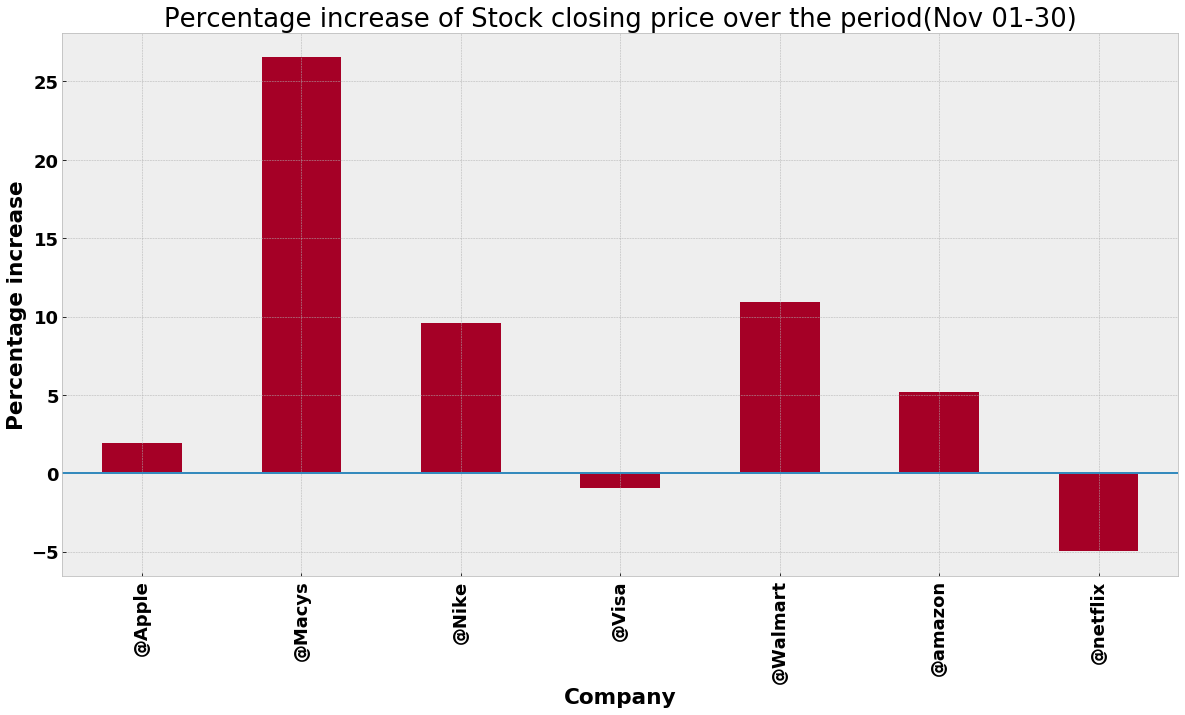

In [11]:
stock_tweets_final_grouped = stock_tweets_final.groupby("Company").agg(['first', 'last'])

difference_sp = pd.DataFrame(stock_tweets_final_grouped["Adj Close"]["last"] - stock_tweets_final_grouped["Adj Close"]["first"])

percentage_change = pd.DataFrame((difference_sp[0]/stock_tweets_final_grouped["Adj Close"]["first"])*100)
percentage_change = percentage_change.rename(columns={0:"PercentageIncrease"})
percentage_change

percentage_change.plot(kind="bar",cmap=plt.cm.RdYlGn,legend=False,figsize=(20,10))
plt.axhline(0)
plt.ylabel("Percentage increase")

plt.title("Percentage increase of Stock closing price over the period(Nov 01-30)")
plt.savefig("figures/ppt/PercentageIncrease_Stocks_Bar.png")

plt.show()

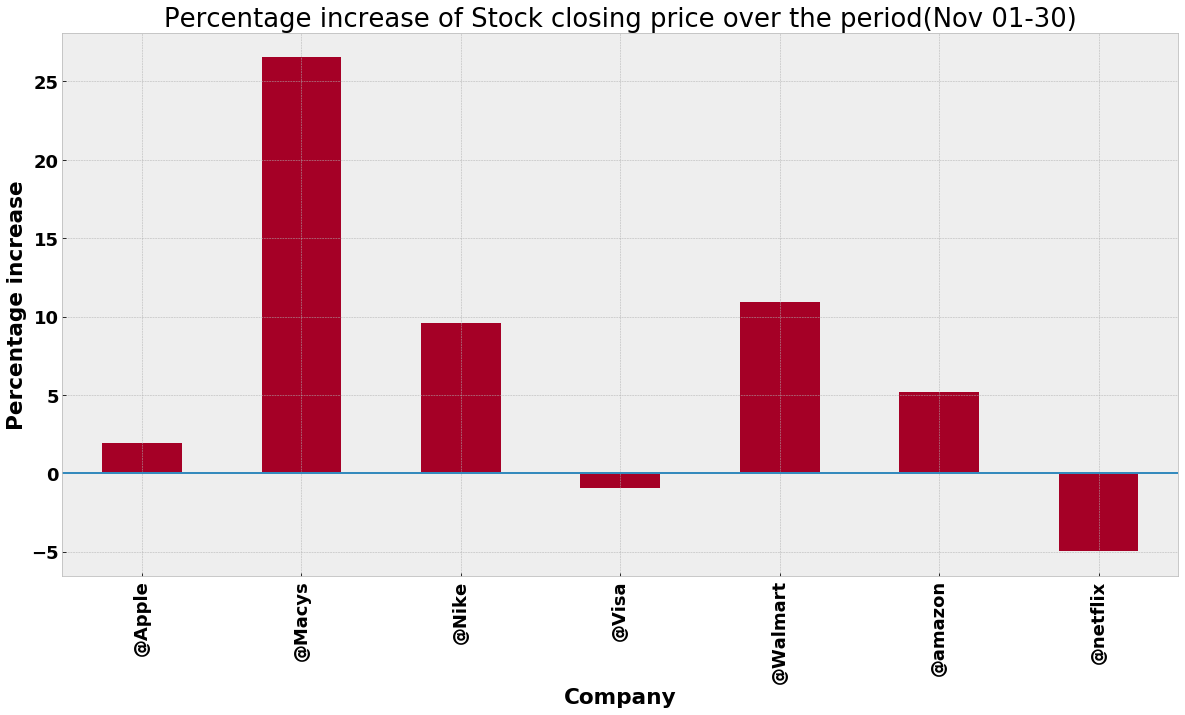

In [12]:
percentage_change.plot(kind="bar",cmap=plt.cm.RdYlGn,legend=False,figsize=(20,10))
plt.axhline(0)
plt.ylabel("Percentage increase")

plt.title("Percentage increase of Stock closing price over the period(Nov 01-30)")
plt.savefig("figures/ppt/PercentageIncrease_Stocks_Bar.png")

plt.show()

In [13]:
company_summary['Tweet_sentiment'].plot(kind='bar',figsize=(20,10), legend = False, fontsize=12,color='blue')



plt.axhline(0)
plt.ylabel("Average Sentiments")

plt.title("Average Sentiments of Tweets over the period(Nov 01-30)")
plt.savefig("figures/ppt/AverageSentiments_Tweets_Bar.png")


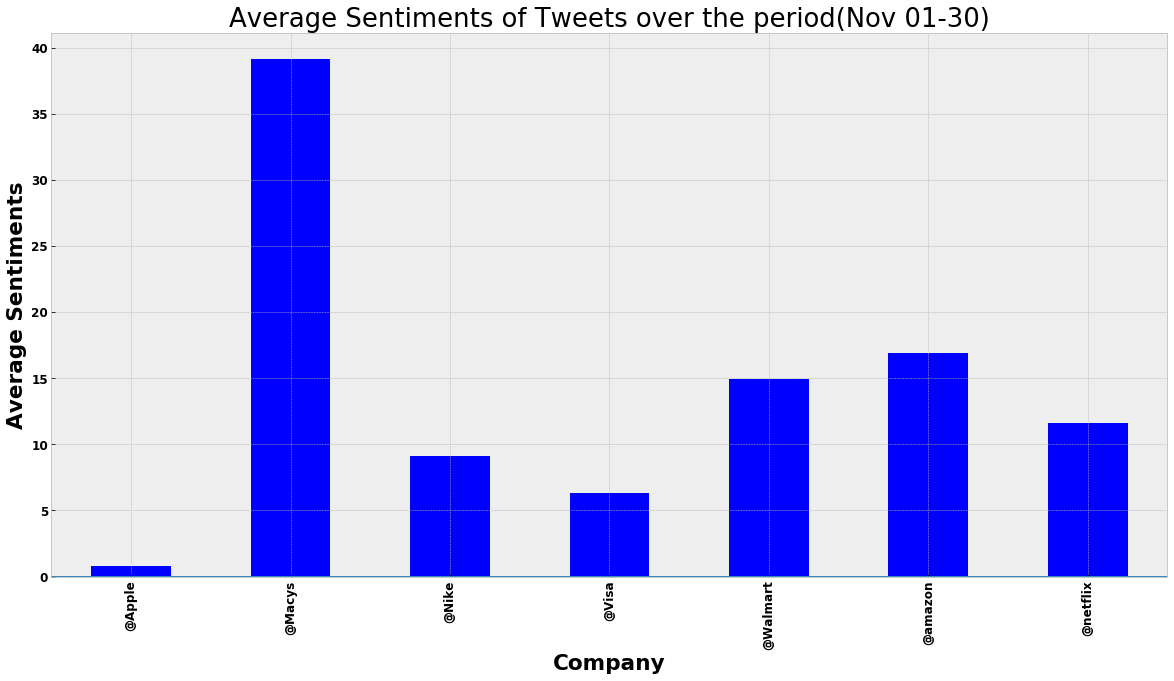

In [14]:
plt.show()